# ¿Qué vende un coche?<a id='intro'></a> 

El anunciante de autos usados Crankshaft List quiere saber como ses ven influidas sus ventas dependiendo de los diferentes factores que poseen sus vehículos, para ellos nos contrata para hacer un analisis profundo de las diferentes variables de sus vehículos.

## Objetivo: 
Probar las siguientes hipótesis:
1. El valor de los vehículos es inversamente proporcional al modelo.
2. Las millas recorridas del vehículo afectan el precio final.
3. La condición del vehículo es directamente proporcional al precio final.
4. El tipo de transmisión influye en el precio del vehículo.
5. Existe una preferencia de colores a la hora de comprar un vehiculo.




## Etapas 
El proyecto se desarrollará en cuatro etapas:
 1. Descripción de los datos
 2. Preprocesamiento de datos
 3. Análisis exploratorio de datos
 4. Conclusión general



# Contenidos <a id='back'></a> 

* Etapa 1. Descripción de los datos
    * Carga de las librerías
    * Cargar datos
        * Explorar datos iniciales
    * Revisión detallada de cada columna
    * Conclusiones y siguientes pasos
* Etapa 2. Preprocesamiento de datos
    * Tratamiento de valores ausentes
    * Corregir tipos de datos
    * Enriquecer datos
* Etapa 3. Análisis exploratorio de datos
    * Estudiar parámetros principales
    * Estudiar y tratar valores atípicos
    * Estudiar parámetros principales sin valores atípicos
    * Período de colocación de los anuncios
    * Precio promedio por cada tipo de vehículo
    * Factores de precio
* Etapa 4. Conclusión final

## Inicialización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cargar datos

In [2]:
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



Veamos como se compone nuestro DataFrame

In [3]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Vamos a ver el tipo y número de datos que posee

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Podemos ver que hay varias columnas con datos ausentes, `date_posted` es del tipo object, pasa lo mismo con `price`, `is_4wd`, `cylinders` y `model_year` que poseen mal los tipos de datos y no deberia ser asi, ya vamos a tratar cada problema mas adelante

In [5]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Aca podemos ver con mayor detalle el número de datos ausentes para cada columna, las cuales trataremos a continuación para rellenar los valores ausentes para un correcto analisis

In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusiones y siguientes pasos

Por el momento se observan datos ausentes en 5 columnas, hay datos raros como ser precios a 1 dolar, 0 millas y 0 días publicados, seria precipitado sacar conclusiones en esta etapa del analisis ya que faltan datos que podrian llegar a cambiar los valores que se observan.
A continuación se van a rellenar los valores ausentes y analisar nuevamente estos


## Tratar los valores ausentes 

Vamos a comenzar con rellenar los valores para 4wd, como son valores  booleanos que se indentifican con 1 si los vehículos cuentan con tracción en las 4 ruedas, en este caso solo se relleno cuando contaban con 4wd entonces en los vehículos que no cuentan con 4wd directamente se obvio el relleno, produciendo los valores ausentes.


In [7]:
df['is_4wd'].isna().sum()

25953

Voy a rellenar los valores ausentes como 0, como deberia haber sido desde un principio.

In [8]:
df['is_4wd'] = df['is_4wd'].fillna('0')


Nos vamos a fijar si se aplicaron los cambios

In [9]:
df['is_4wd'].isna().sum()

0

Veamos los valores NaN  de model_year 


In [10]:
df['model_year'].unique()


array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

Voy a rellenar los datos NaN de los vehículos con los modelos de los vehículos, con la mediana ya que la media tiene un desvio standar de 6 años y sumar o restar 6 años de un vehículo puede influir mucho en el valor final de los vehiculos y  luego confirmar si se aplicaron los cambios

In [11]:
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))
df['model_year'].isna().sum()

0

Ahora vamos a realizar lo mismo con las cilindradas de los modelos, en este caso tambien voy a usar la mediana ya que coincide con la media

In [12]:
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))
df['cylinders'].isna().sum()

0

Aplicamos lo mismo para el odometro, usando la media ya que considero que es un mejor estadistico y representa un valor mas preciso de los valores reales


In [13]:
df['odometer'] = df['odometer'].fillna(df.groupby('cylinders')['odometer'].transform('mean'))
df['odometer'].isna().sum()

0

Veamos como se conforman los valores de la pintura


In [14]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Despues de muchas pruebas y errores decidi rellenar los valores ausentes como desconocido ('unknown'), no se podian eliminar los valores ausentes ya que eran demaciados y es solo una variable cualitativa

In [15]:
df['paint_color'] = df['paint_color'].fillna('unknown')
df['paint_color'].isna().sum()

0

Veamos si se realizaron el relleno de los valores ausentes correctamente 

In [16]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Corregir los Dtype

Corregimos el tipo de datos de `date_posted` ya que deberia ser un datetime

In [17]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

Adicionalmente se van a cambiar los valores float de `model_year` y `cylinders` a int,  `is_4wd` a booleano y `price` como float

In [18]:
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(bool)
df['price'] = df['price'].astype(float)

Revisemos los datos nuevamente

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


## Enriquecer datos

Vamos agregar datos para facilitar el análisis

In [20]:
df['date_posted_year'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month
df['wd_posted'] = df['date_posted'].dt.weekday

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,month_posted,wd_posted
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,5
1,25500.0,2011,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2018,10,4
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,True,2019-02-07,79,2019,2,3
3,1500.0,2003,ford f-150,fair,8,gas,124383.376062,automatic,pickup,unknown,True,2019-03-22,9,2019,3,4
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,True,2019-04-02,28,2019,4,1
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,2018,6,2
6,12990.0,2015,toyota camry,excellent,4,gas,79212.000000,automatic,sedan,white,True,2018-12-27,73,2018,12,3
7,15990.0,2013,honda pilot,excellent,6,gas,109473.000000,automatic,SUV,black,True,2019-01-07,68,2019,1,0
8,11500.0,2012,kia sorento,excellent,4,gas,104174.000000,automatic,SUV,unknown,True,2018-07-16,19,2018,7,0
9,9200.0,2008,honda pilot,excellent,6,gas,147191.000000,automatic,SUV,blue,True,2019-02-15,17,2019,2,4


In [21]:
df.dtypes

price                      float64
model_year                   int64
model                       object
condition                   object
cylinders                    int64
fuel                        object
odometer                   float64
transmission                object
type                        object
paint_color                 object
is_4wd                        bool
date_posted         datetime64[ns]
days_listed                  int64
date_posted_year             int64
month_posted                 int64
wd_posted                    int64
dtype: object

Agregemos la antigüedad del vehículo para que sea mas facil visualizar la relación de los precios/vehículos

In [22]:
df['vehicle_age'] = df['date_posted_year'] - df['model_year'] + 1
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,month_posted,wd_posted,vehicle_age
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,5,8
1,25500.0,2011,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2018,10,4,8
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,True,2019-02-07,79,2019,2,3,7
3,1500.0,2003,ford f-150,fair,8,gas,124383.376062,automatic,pickup,unknown,True,2019-03-22,9,2019,3,4,17
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,True,2019-04-02,28,2019,4,1,3


In [23]:
df['date_posted_year'] = df['date_posted_year'].astype('float')
df.dtypes

price                      float64
model_year                   int64
model                       object
condition                   object
cylinders                    int64
fuel                        object
odometer                   float64
transmission                object
type                        object
paint_color                 object
is_4wd                        bool
date_posted         datetime64[ns]
days_listed                  int64
date_posted_year           float64
month_posted                 int64
wd_posted                    int64
vehicle_age                  int64
dtype: object

Ahora que tenemos la antigüedad de los vehículos, podemos calcular las millas por años y comparar luego con el estado de los vehículos dependiendo de las millas recorridas por año.

In [24]:
df['miles_year'] = df['odometer']/df['vehicle_age']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,month_posted,wd_posted,vehicle_age,miles_year
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2018.0,6,5,8,18125.000000
1,25500.0,2011,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2018.0,10,4,8,11088.125000
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,True,2019-02-07,79,2019.0,2,3,7,15714.285714
3,1500.0,2003,ford f-150,fair,8,gas,124383.376062,automatic,pickup,unknown,True,2019-03-22,9,2019.0,3,4,17,7316.669180
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,True,2019-04-02,28,2019.0,4,1,3,26967.666667


In [25]:
df['miles_year'].isna().sum()

0

Creamos un diccionario con condición de los vehículos y reemplazar los valores, para que sea mas facil visualizar despues las relaciones 

In [26]:
condition_dict = {'new':0,
                 'like new':1,
                 'excellent':2,
                 'good':3,
                 'fair':4,
                 'salvage':5}


In [27]:
df['condition'] = df['condition'].replace(condition_dict)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,month_posted,wd_posted,vehicle_age,miles_year
0,9400.0,2011,bmw x5,3,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2018.0,6,5,8,18125.000000
1,25500.0,2011,ford f-150,3,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2018.0,10,4,8,11088.125000
2,5500.0,2013,hyundai sonata,1,4,gas,110000.000000,automatic,sedan,red,True,2019-02-07,79,2019.0,2,3,7,15714.285714
3,1500.0,2003,ford f-150,4,8,gas,124383.376062,automatic,pickup,unknown,True,2019-03-22,9,2019.0,3,4,17,7316.669180
4,14900.0,2017,chrysler 200,2,4,gas,80903.000000,automatic,sedan,black,True,2019-04-02,28,2019.0,4,1,3,26967.666667


## Comprobar datos limpios

Comprobamos como quedaron los datos luego de la manipulación

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  float64       
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  date_posted_year  51525 non-null  float64       
 14  month_posted      5152

In [29]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,month_posted,wd_posted,vehicle_age,miles_year
0,9400.0,2011,bmw x5,3,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2018.0,6,5,8,18125.000000
1,25500.0,2011,ford f-150,3,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2018.0,10,4,8,11088.125000
2,5500.0,2013,hyundai sonata,1,4,gas,110000.000000,automatic,sedan,red,True,2019-02-07,79,2019.0,2,3,7,15714.285714
3,1500.0,2003,ford f-150,4,8,gas,124383.376062,automatic,pickup,unknown,True,2019-03-22,9,2019.0,3,4,17,7316.669180
4,14900.0,2017,chrysler 200,2,4,gas,80903.000000,automatic,sedan,black,True,2019-04-02,28,2019.0,4,1,3,26967.666667
5,14990.0,2014,chrysler 300,2,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,2018.0,6,2,5,11590.800000
6,12990.0,2015,toyota camry,2,4,gas,79212.000000,automatic,sedan,white,True,2018-12-27,73,2018.0,12,3,4,19803.000000
7,15990.0,2013,honda pilot,2,6,gas,109473.000000,automatic,SUV,black,True,2019-01-07,68,2019.0,1,0,7,15639.000000
8,11500.0,2012,kia sorento,2,4,gas,104174.000000,automatic,SUV,unknown,True,2018-07-16,19,2018.0,7,0,7,14882.000000
9,9200.0,2008,honda pilot,2,6,gas,147191.000000,automatic,SUV,blue,True,2019-02-15,17,2019.0,2,4,12,12265.916667


## Estudiar parámetros principales

Analizaremos las relaciones de datos que identificamos como posibles factores a tener en cuenta a la hora de comprar un vehículo por parte de los compradores

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Graficaremos histogramas con los valores para identificar posibles valores que influencien en los datos

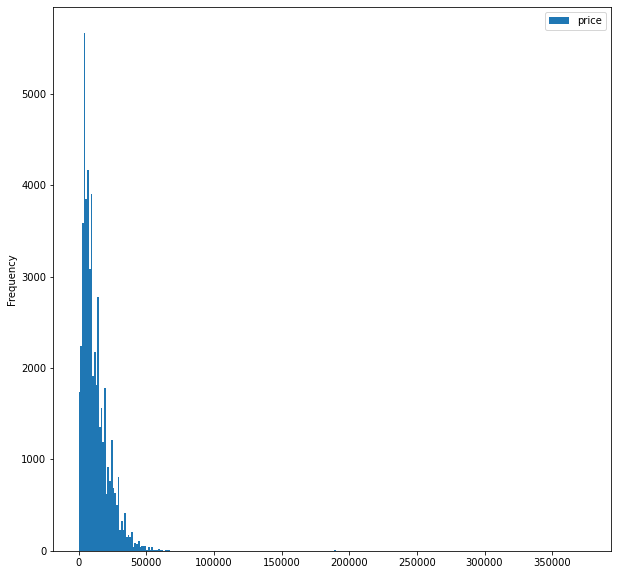

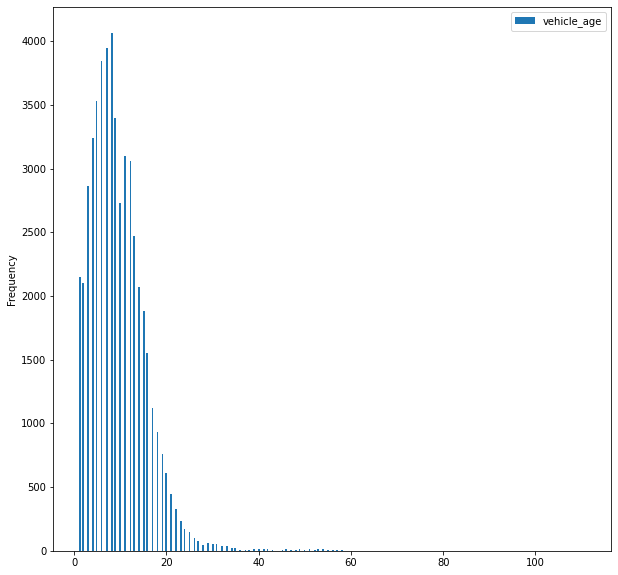

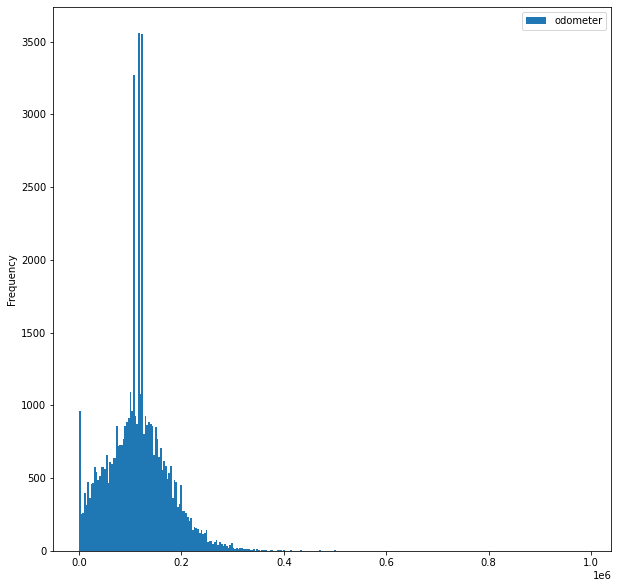

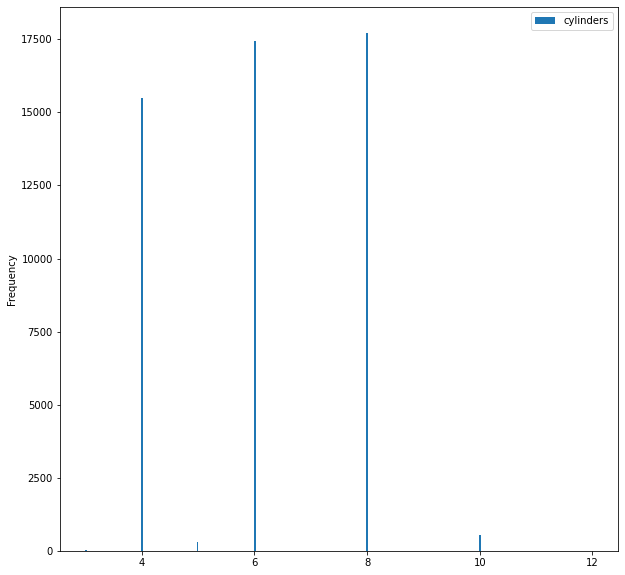

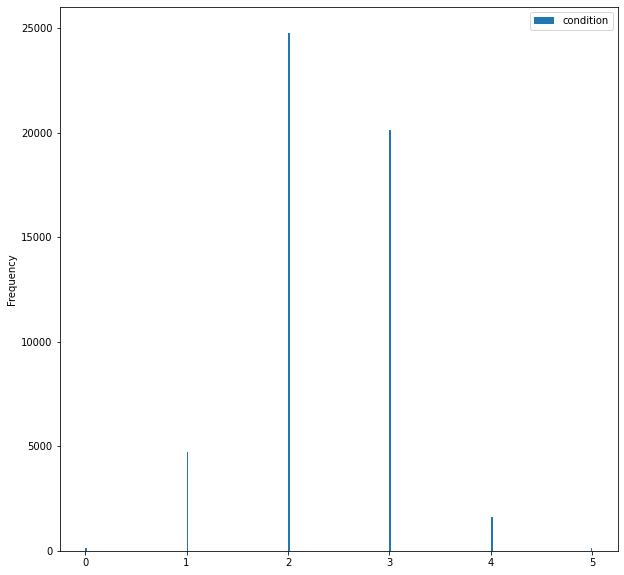

In [30]:
parametros_2 = df.filter(['price', 'vehicle_age', 'odometer', 'cylinders', 'condition'])
for values in parametros_2 :
     parametros_2.plot(y=values, kind='hist', bins=300, figsize= (10, 10))

Se observan valores atipicos en los histogramas de los precios, la edad del vehiculo y el odometro con valores iguales a 0, configure los histogramas con bins=300 para ver mejor la distribucion de estos valores.
El valor de bins fue igual a 300 para observar mejor los valores 0 o cercanos a 0

## Estudiar y tratar valores atípicos



Voy a ver la distribucion de los valores de los parametros que me interesan

In [31]:
parametros2 = df.filter(['price', 'vehicle_age', 'odometer'])
parametros2.describe(percentiles=list(np.linspace(0, 1, 21)) + [0.98, 0.99])

,price,vehicle_age,odometer
count,51525.000000,51525.000000,51525.000000
mean,12132.464920,9.513906,115532.865258
std,10040.803015,6.112976,59988.326094
min,1.000000,1.000000,0.000000
0%,1.000000,1.000000,0.000000
5%,1950.000000,2.000000,19000.000000
10%,2995.000000,3.000000,36944.600000
15%,3800.000000,4.000000,52325.000000
20%,4500.000000,4.000000,66950.000000
25%,5000.000000,5.000000,78939.000000


Vemos que hay valores de vehiculos a 1 dolar, edad del vehiculo de 0 años y el odometro = 0 millas, el valor de 1 dolar es claramente un error de tipeo, si bien pueden resultar extraños los valores de 0 años y 0 millas, puede ser que sean valores de autos nuevos con 0 mi, si lo pensamos asi no están malo estos datos

Vamos a estimar los valores de IQR y las ramas positivas y negativas de IQR

In [32]:
#Estimamos IQR por columna
price_IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
vehicle_age_IQR = df['vehicle_age'].quantile(0.75) - df['vehicle_age'].quantile(0.25)
odometer_IQR = df['odometer'].quantile(0.75) - df['odometer'].quantile(0.25)

print(price_IQR)
print(vehicle_age_IQR)
print(odometer_IQR)

11839.0
8.0
67612.0


In [33]:
# Determinamos los límites inferiores para valores atípicos
price_inf= df['price'].quantile(0.25) - 1.5 * price_IQR
vehicle_age_inf = df['vehicle_age'].quantile(0.25) - 1.5 * vehicle_age_IQR
odometer_inf = df['odometer'].quantile(0.25) - 1.5 * odometer_IQR

print(price_inf)
print(vehicle_age_inf)
print(odometer_inf)

-12758.5
-7.0
-22479.0


In [34]:
# Determinamos los límites superiores para valores atípicos

price_sup = df['price'].quantile(0.75) + 1.5 * price_IQR
vehicle_age_sup  = df['vehicle_age'].quantile(0.75) + 1.5 * vehicle_age_IQR
odometer_sup = df['odometer'].quantile(0.75) + 1.5 * odometer_IQR

print(price_sup)
print(vehicle_age_sup)
print(odometer_sup)

34597.5
25.0
247969.0


Voy almacenar los datos en un nuevo DataFrame tomando el valor minimo del precio como 1950 dolares que es el valor del 5% de los datos en la columna de price

In [35]:
# Almacenamos los datos sin valores atípicos en un DataFrame separado

df_no_atypical = df[(df['price'] > 1950) &
                 (df['price'] < price_sup) &
                 (df['vehicle_age'] > vehicle_age_inf) &
                 (df['vehicle_age'] < vehicle_age_sup) &
                 (df['odometer'] > odometer_inf) &
                 (df['odometer'] < odometer_sup) 
                 ]

df_no_atypical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45597 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             45597 non-null  float64       
 1   model_year        45597 non-null  int64         
 2   model             45597 non-null  object        
 3   condition         45597 non-null  int64         
 4   cylinders         45597 non-null  int64         
 5   fuel              45597 non-null  object        
 6   odometer          45597 non-null  float64       
 7   transmission      45597 non-null  object        
 8   type              45597 non-null  object        
 9   paint_color       45597 non-null  object        
 10  is_4wd            45597 non-null  bool          
 11  date_posted       45597 non-null  datetime64[ns]
 12  days_listed       45597 non-null  int64         
 13  date_posted_year  45597 non-null  float64       
 14  month_posted      4559

El numero de datos por columna se redujo en 5539 datos que tomamos como atipicos

## Estudiar parámetros principales sin valores atípicos

Veamos como quedaron los histogramas ahora que eliminamos los valores atipicos

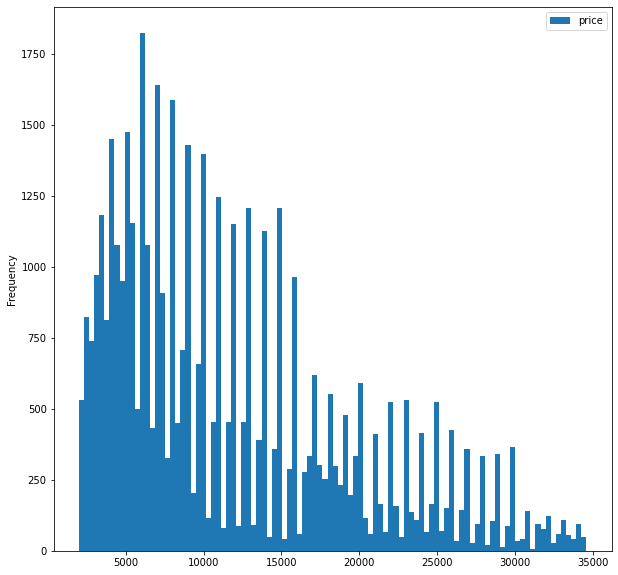

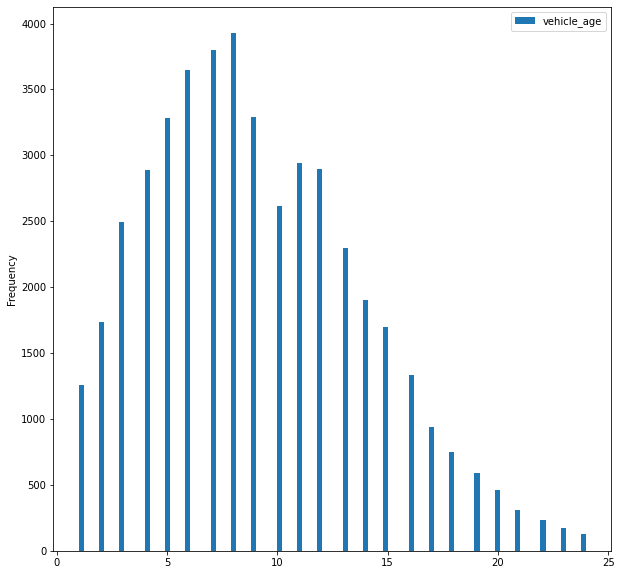

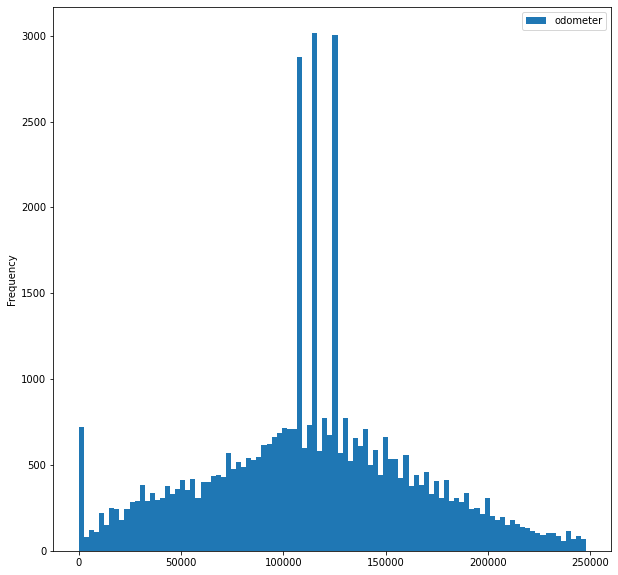

In [36]:
new_parametros = df_no_atypical.filter(['price', 'vehicle_age', 'odometer'])
for values in new_parametros:
     new_parametros.plot(y=values, kind='hist', bins=100, figsize= (10, 10))    

Ahora se observan mejor las graficas sin los valores atipicos

Conclusiones intermedias

Podemos ver que los datos se encuentran mejor distribuidos, las curvas son mas chatas y se aprecian mejor los datos sin los datos atipicos

## Periodo de colocación de los anuncios



Vamos a buscar los valores de la media y de la mediana de los dias publicados al igual que aquellos valores anormalmente cortos y largos, para ellos vamos a ver los percentiles de la columna `days_posted`

In [37]:
df_no_atypical['days_listed'].describe(percentiles=list(np.linspace(0, 1, 21)) + [0.98, 0.99])

count    45597.000000
mean        39.571090
std         28.226522
min          0.000000
0%           0.000000
5%           7.000000
10%         10.000000
15%         13.000000
20%         16.000000
25%         19.000000
30%         22.000000
35%         24.000000
40%         27.000000
45%         30.000000
50%         33.000000
55%         36.000000
60%         40.000000
65%         44.000000
70%         48.000000
75%         53.000000
80%         59.000000
85%         67.000000
90%         77.000000
95%         94.000000
98%        115.000000
99%        132.000000
100%       271.000000
max        271.000000
Name: days_listed, dtype: float64

Podemos ver que la media tiene un valor de 39.5 días, la mediana son 33 días, los días mas cortos que se encontraron publicados es 0, puede ser un error o que se vendio en el día y el mas largo fue de 271 días pero se puede interpretar que fue un caso especial ya que el 98% = 115 días y el 99% = 132 días.

## Precio promedio por cada tipo de vehículo


Veremos el número de anuncio y el precio promedio para cada tipo de vehículo, graficando la dependencia 

           type       mean  count
0           SUV  39.760217  11231
1         sedan  39.410618  11132
2         truck  39.460421  10536
3        pickup  39.342066   6069
4         coupe  39.341176   1870
5         wagon  40.316818   1433
6      mini-van  39.528493   1088
7     hatchback  40.790306    949
8           van  41.365138    545
9   convertible  38.015337    326
10        other  38.097778    225
11      offroad  40.542857    175
12          bus  48.444444     18


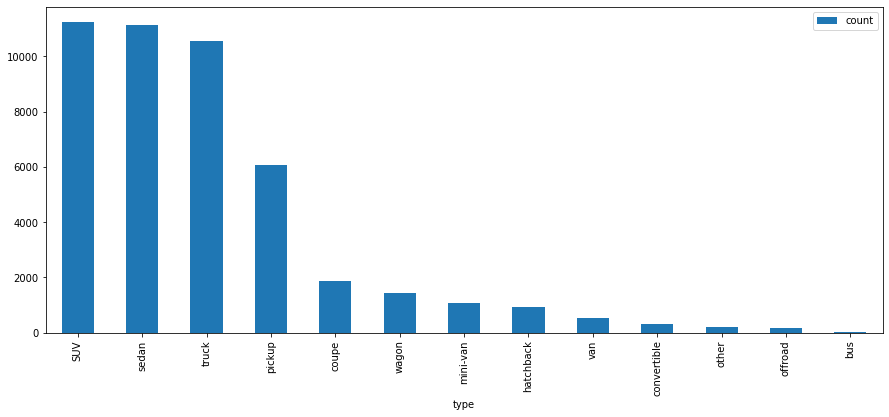

In [38]:
ads_by_days_listed = (
df_no_atypical
 .groupby("type")["days_listed"]
 .agg(["mean", "count"])
 .reset_index()
 .sort_values(by="count", ascending=False)
 .reset_index(drop=True)
)

print(ads_by_days_listed)
ads_by_days_listed.plot(kind="bar", x="type", y="count", figsize=(15, 6))

plt.show()

Se puede observar que los vehiculos con mayor numero de anuncios son: SUV y seguido muy de cerda los Truck y Sedan.
Si bien se pide analizar los 2 primeros con mayor numero de publiciones, la diferencia entre el segundo y tercero es demaciado poca como para ignorarla 

In [39]:
type_price = (
    df_no_atypical.groupby('type')['price']
    .agg('mean').reset_index()
    .sort_values(by="price", ascending=False)
    .reset_index(drop=True)
)

print(type_price)

           type         price
0           bus  19959.166667
1         truck  15851.191439
2        pickup  15476.717581
3       offroad  14851.354286
4         coupe  14516.559358
5   convertible  13626.131902
6           SUV  11013.996527
7         other  10862.742222
8           van   9388.429358
9         wagon   9327.307048
10     mini-van   8405.265625
11        sedan   7450.754581
12    hatchback   7191.444679


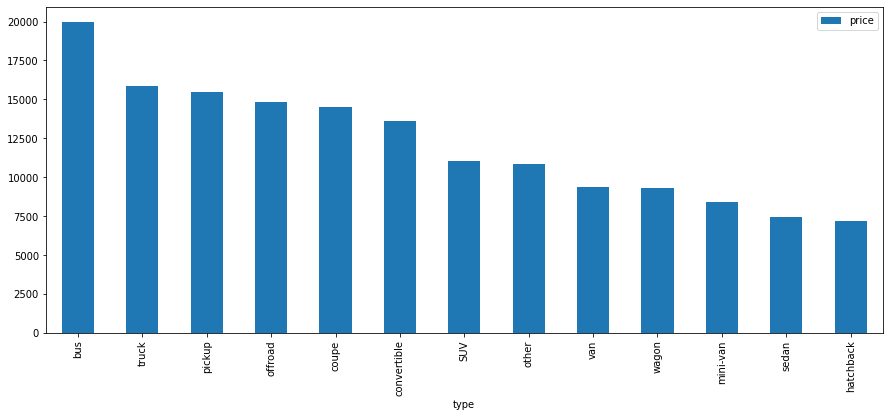

In [40]:
type_price.plot(kind="bar", x="type", y="price", figsize=(15, 6))
plt.show()

Cuando vemos los precios para compararlos vemos que los Truck son los 2° mas caros, esto no es anormal ya que son vehiculos para trabajos de transporte de cargas, los SUV se encuentran en el rango de la median de los valores y al ser de gran capacidad, no es de extrañar que sean muy buscados y por ultimo los Sedan son los 2° mas baratos casi a la par de los Hatchback dentro de los vehiculos publicados, por una cuestion de mercadeo deben saber que se venden mas facilmente que los Hatchback, es por ello el gran numero de publicaciones de este tipo de vehiculos

## Factores de precio

Vamos a realizar una matriz de correlación para comparar las diferentes variables `price`, `vehicle_age`, `miles_year`, `condition`, `transmission` y `paint_color`con los vehículos que identificamos anteriormente, para corrobirar si existe o no la dependencia de las variables con respecto al precio.

In [41]:
impact = df_no_atypical.query('type == ("suv", "sedan", "truck")')
impact.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,date_posted_year,month_posted,wd_posted,vehicle_age,miles_year
price,1.000000,0.469797,-0.170420,0.473509,-0.310178,NaN,0.005975,0.007919,-0.007647,-0.004336,-0.467558,0.248034
model_year,0.469797,1.000000,-0.259162,-0.182169,-0.482717,NaN,-0.004247,0.018192,-0.016839,-0.007693,-0.995101,0.495739
condition,-0.170420,-0.259162,1.000000,0.121581,0.250974,NaN,-0.001807,-0.011869,0.008657,0.003096,0.257185,-0.068933
cylinders,0.473509,-0.182169,0.121581,1.000000,0.187179,NaN,0.003691,0.003919,-0.004024,-0.003499,0.181992,-0.009849
odometer,-0.310178,-0.482717,0.250974,0.187179,1.000000,NaN,0.002166,-0.009160,0.015973,0.007571,0.480315,0.210519
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,0.005975,-0.004247,-0.001807,0.003691,0.002166,NaN,1.000000,0.007662,-0.006070,0.009336,0.004992,-0.006279
date_posted_year,0.007919,0.018192,-0.011869,0.003919,-0.009160,NaN,0.007662,1.000000,-0.817086,-0.009354,0.080741,-0.108321
month_posted,-0.007647,-0.016839,0.008657,-0.004024,0.015973,NaN,-0.006070,-0.817086,1.000000,0.009769,-0.064004,0.092094
wd_posted,-0.004336,-0.007693,0.003096,-0.003499,0.007571,NaN,0.009336,-0.009354,0.009769,1.000000,0.006745,0.000697


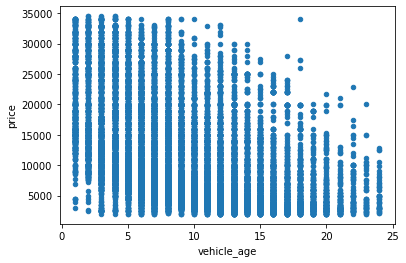

In [42]:
impact.plot(x='vehicle_age', y='price',kind='scatter') 
plt.show()

El precio de los vehiculos es inversamente proporcional a la edad del vehiculo, esto es logico porque mientras es mas viejo es mas barato

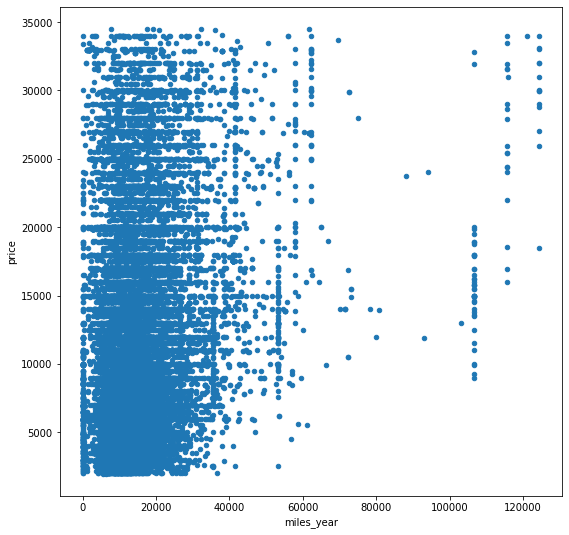

In [43]:
impact.plot(x='miles_year', y='price',kind='scatter', figsize=(9, 9)) 
plt.show()

En este caso se puede observar que es apenas directamente propocional el precio del vehiculo con la cantidad de millas que posee, aunque no es muy claro el grafico

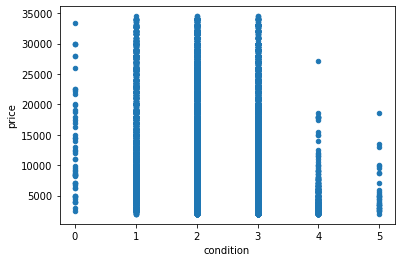

In [44]:
impact.plot(x='condition', y='price',kind='scatter') 
plt.show()

Se ve que no hay relacion entre las condiciones de los vehiculos entre los valores 0 al 3 (para rescate a  excelente), recien en los valores 4 y 5 (como nuevo y nuevo) se observan una relacion inversamente proporcional entre la condicion y el precio del vehiculo

Para las variables de color y transmision vamos a verificar que primero tengan mas de 50 anuncios, antes de graficarlos

In [45]:
impact.groupby('transmission')['transmission'].count()

transmission
automatic    20672
manual         851
other          145
Name: transmission, dtype: int64

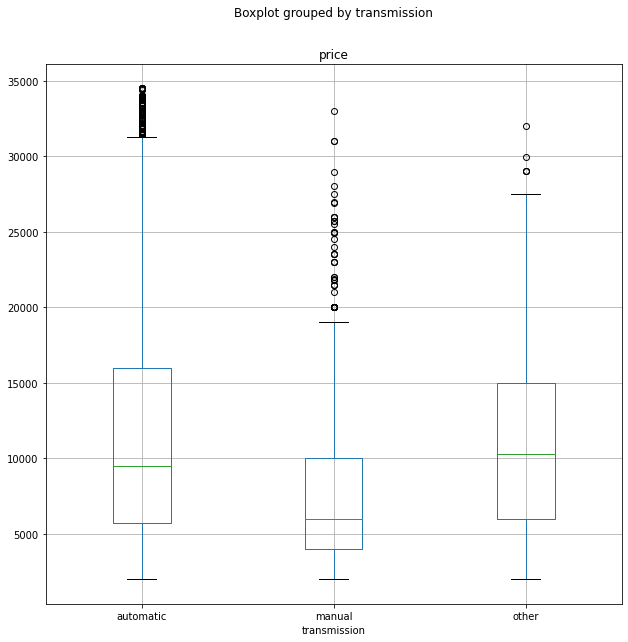

In [46]:
impact.boxplot(column ='price',by='transmission',figsize=(10,10))
plt.show()

Vemos que los vehiculos con transmision `automatica` son la categoria mas cara, pero la media es menor que las de `others` aunque estos son un poco mas baratos que los vehiculos automaticos.
Los vehiculos con `caja manual` son los mas baratos de los 3

In [47]:
impact.groupby('paint_color')['paint_color'].count().sort_values(ascending=False)

paint_color
white      4545
unknown    3817
black      2966
silver     2784
grey       2347
blue       1914
red        1764
custom      528
brown       438
green       402
yellow       79
orange       52
purple       32
Name: paint_color, dtype: int64

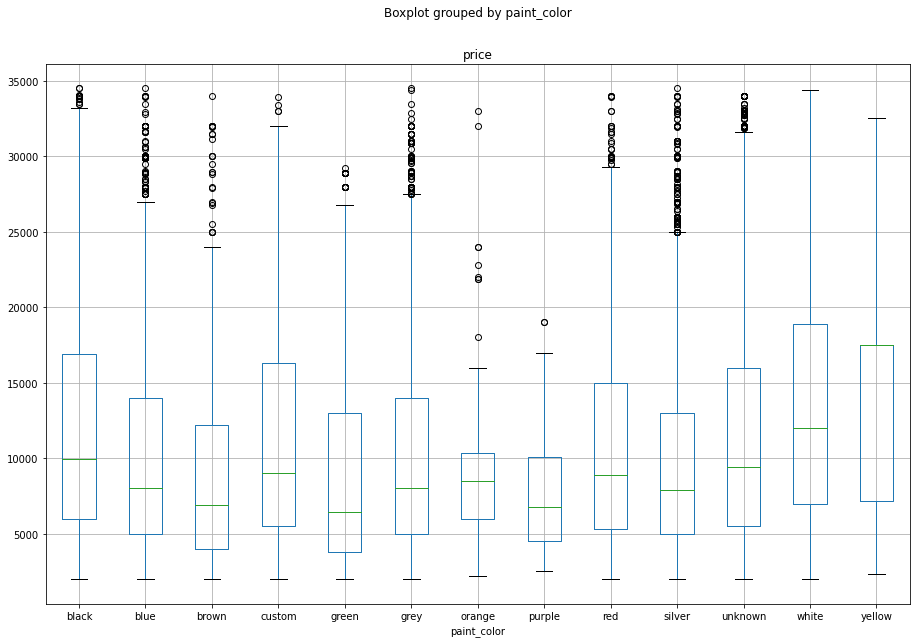

In [48]:
impact.boxplot(column ='price',by='paint_color',figsize=(15,10))
plt.show()

Dentro de los vehiculos cuyo valor son los mas altos son los de color:
 * negro
 * blanco
 * amarillo (su media coincide con el valor superior de la caja, lo que me dice que son autos de rango caros)
 * custom
 * rojos

Los valores desconocidos, naranjas y purpura los dejo de lado, porque o no cumplen con mas de 50 publicaciones por lo que no representan un valor estadisticamente significativo o porque desconosco el verdadero color del vehiculo, pero como se analizo anteriormente el numero de autos con este "color" es demaciado grande para eliminarlos 

## Conclusión Final


Despues de analizar todos los datos se puede llegar a las siguientes conclusiónes:

* Los datos estabán bien cargados solo hubo algunos problemas con valores ausentes  .
* Los valores ausentes para `model_year` y `odometer` se contaba con los valores de la `condición del vehículo` lo  que facilito el analisis para los modelos que si tenían información. 
  Se recomienda para el futuro hacer esos campos obligatorios en el momento de la publicación, para evitar futuros valores ausentes.
* Con la descripción del DataFrame se pudo ver cual era el mejor estadistico para rellenar los valores ausentes en cada uno de los casos.
* Se identificaron valores que que afectaban la distribución de los datos, es por ello que se tuvo que realiazar un nuevo DataFrame para filtrar los valores anormales.

Conclusiones  de las hipótesis:
* Se compro la 1° hipotesis en donde el valor de los vehículos es inversamente proporcial a la antigüedad del modelo, esto es conciso ya que los autos mas viejos son mas prospenso a tener averias y su valor es inferior a medida que pasan los años.
* En la 2° hipotesis vemos que realmete las millas recoridas afectan el valor final del vehículo porque es una buena relación del uso que tuvo el vehículo.
* En el caso de la 3° hipotesis se rechaza ya que no se observan una relación directa entre la condición y el precio, al contrario se observo que la relación condición/precio es casi nula y en las condiciones 4 y  5 esta relación era inversamente proporcional al precio.
* Cuando comparamos si la transmision influye en el precio del vehículo, se evidencia que la mas buscada es la `transmisión automatica`.
* Con la 5° y ultima hipotesis vemos una clara preferencia por ciertos colores a la hora de comprar el vehículo, estos son :
 - negro
 - blanco
 - amarillo 
 - custom
 - rojos

* Inferir en el porque de la elección va mas alla de datos proporcionados pero si podemos sugerir que se adquieran vehículos de esos colores ya que son los mas demandados y van a tener una alta taza de venta siempre que se cumplan con el resto de los valores analizados anteriormente.
  